<a href="https://colab.research.google.com/github/44REAM/RA-Medphys/blob/main/Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft

# Basis function

## Quadratic functions

$$y = ax^2 + bx + c$$
$a\neq 0, b,c \ \text{constant} $



In [ ]:
def quadratic(x, a = 1, b = 0, c = 0):
    return a*x**2 + b*x + c

x = 1
y = quadratic(x)
print(y)

1


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
x = np.arange(-2,2, 0.1)
y = quadratic(x)
print(y)

[4.00000000e+00 3.61000000e+00 3.24000000e+00 2.89000000e+00
 2.56000000e+00 2.25000000e+00 1.96000000e+00 1.69000000e+00
 1.44000000e+00 1.21000000e+00 1.00000000e+00 8.10000000e-01
 6.40000000e-01 4.90000000e-01 3.60000000e-01 2.50000000e-01
 1.60000000e-01 9.00000000e-02 4.00000000e-02 1.00000000e-02
 3.15544362e-30 1.00000000e-02 4.00000000e-02 9.00000000e-02
 1.60000000e-01 2.50000000e-01 3.60000000e-01 4.90000000e-01
 6.40000000e-01 8.10000000e-01 1.00000000e+00 1.21000000e+00
 1.44000000e+00 1.69000000e+00 1.96000000e+00 2.25000000e+00
 2.56000000e+00 2.89000000e+00 3.24000000e+00 3.61000000e+00]


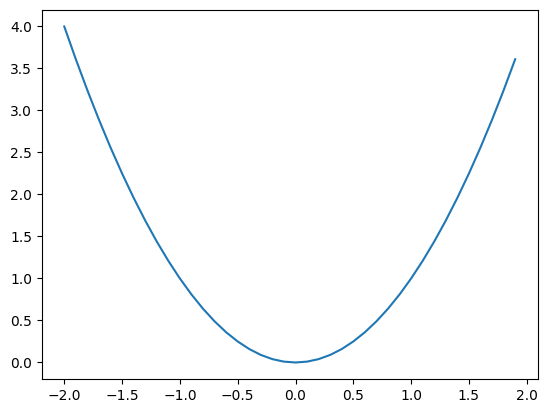

In [ ]:

plt.plot(x,y)


## Trigonometric functions

$$y = sin (x)$$
$$y = cos (x)$$

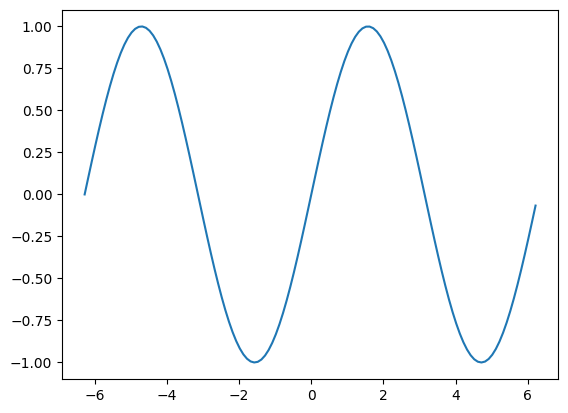

In [ ]:
x = np.arange(-2*np.pi,2*np.pi, 0.1)
y = np.sin(x)

plt.plot(x,y)

## Exponential decay

$$y=\begin{cases}
    e^{-ax}, & x\ge0\\
    0, & x<0.
  \end{cases}$$

In [ ]:
def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0


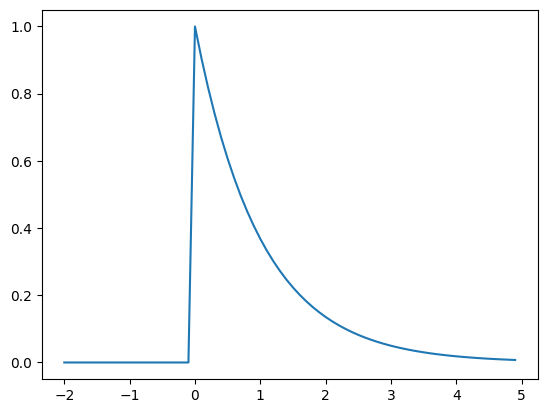

In [ ]:
exp_decay_v = np.vectorize(exp_decay, otypes=[float])
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)
plt.plot(x,y)

## Error function erf(x)

$$erf(x) = \frac{2}{\sqrt{π}} ∫^x_0 {e^{-y^2} dy}$$

In [ ]:
def my_integral(y):
    return np.exp(-y**2)

def erf(x):
    return integrate.quad(my_integral, 0, x)[0] * 2 / np.sqrt(np.pi)

erf_v = np.vectorize(erf)

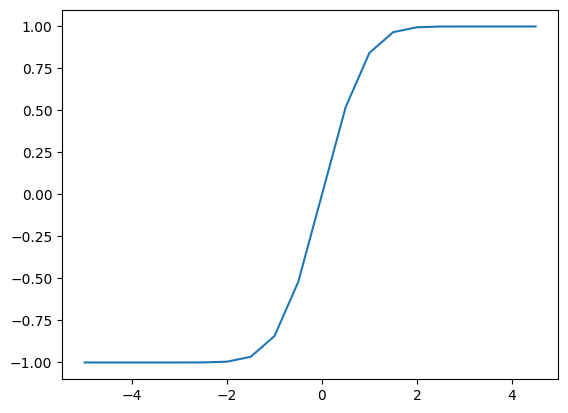

In [ ]:
x = np.arange(-5, 5, 0.5)
y = erf_v(x)
plt.plot(x,y)

## Example

### Sketch the graph of $e^{-|x|}$

In [ ]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x,a = 1):

    return 0


### Sketch the graph of $q_a=\begin{cases}
    1-\frac{|x|}{a}, & x\le a\\
    0, & x>a.
  \end{cases}$

In [ ]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x, a = 1):

    return 0


# Detector response functions

## Rectangular pulse functions $p_a(x), a>0$

## Parabolic functions $s_R(x)$



## Translation and reflection

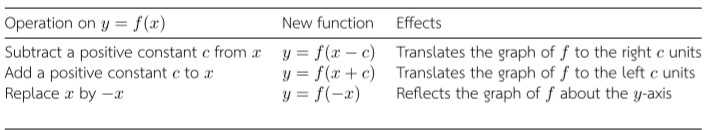

In [ ]:
# Suppose we have a pre-defined function below
# write the code for translation and reflection

def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0

def right_translation(x,y, translation = 0):
    return x+translation, y

# Your code here
# write code for reflection
def reflection(x,y):
    return x,y
exp_decay_v = np.vectorize(exp_decay, otypes=[float])


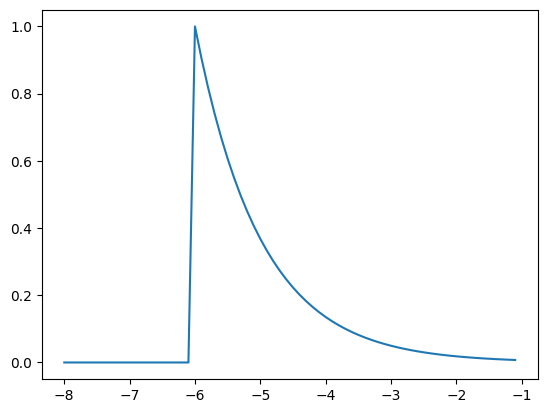

In [ ]:

x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = right_translation(x,y, translation = -6)
plt.plot(x,y)

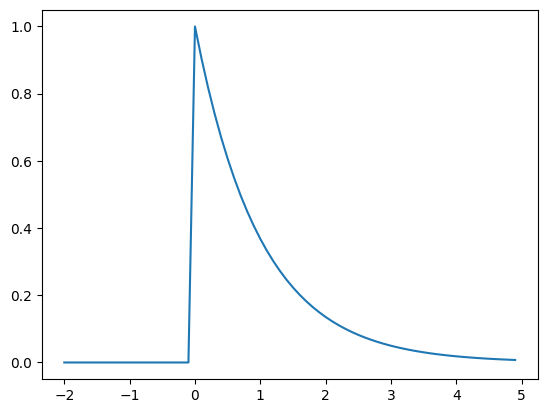

In [ ]:
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = reflection(x,y)
plt.plot(x,y)

# Fourier transform property



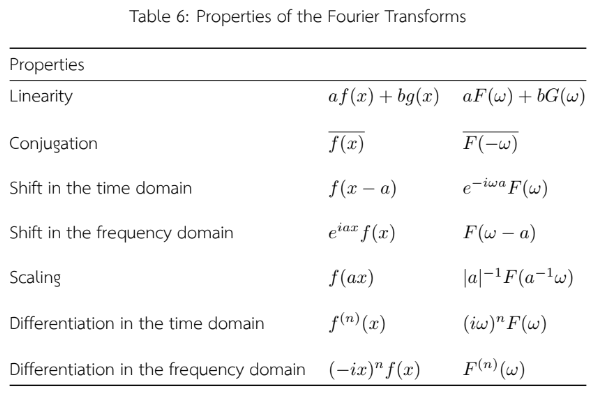

## Convolution theorem

$$F(f\ast g)(ω) = F(ω)G(ω)$$

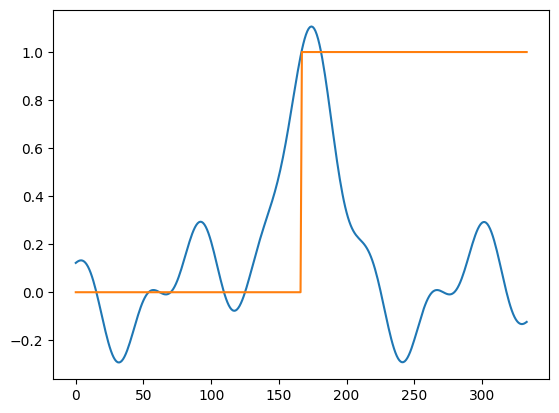

In [ ]:
x = np.arange(-5,5,0.03)
f = signal.gaussian(len(x), std=20) + np.sin(x*2)*0.2 + np.sin(x*5)*0.1
g = np.heaviside(x, 1)

plt.plot(f)
plt.plot(g)

$$f(x)\ast g (x)$$

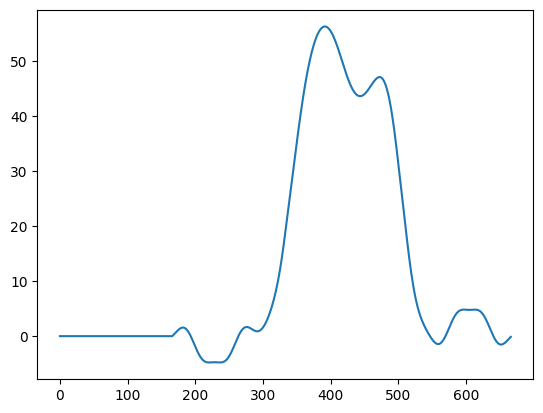

In [ ]:
conv_results = np.convolve(f, g)
plt.plot(conv_results)

In [ ]:
fourier_conv = fftshift(fft(conv_results))
freq_conv = fftshift(fftfreq(len(conv_results)))

f = np.pad(f, (0, len(f)), 'constant', constant_values=0)
g = np.pad(g, (0, len(g)), 'constant', constant_values=0)
fourier_f = fftshift(fft(f))
freq_f = fftshift(fftfreq(len(f)))
fourier_g = fftshift(fft(g))


$$\mathcal{F}(f(x)\ast g (x))$$

In [26]:
plt.plot( np.abs(fourier_conv)[(freq_conv>-0.05)& (freq_conv<0.05)] )

NameError: ignored

$$\mathcal{F}(f(x)) × \mathcal{F}(g(x))$$

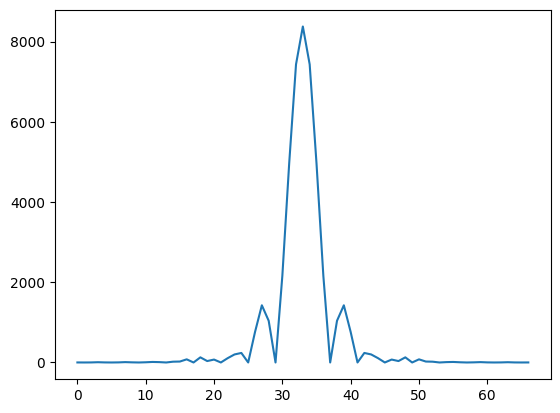

In [ ]:
plt.plot(np.abs(fourier_g * fourier_f)[(freq_f>-0.05)& (freq_f<0.05)] )

$$\mathcal{F}^{-1}(F(ω)G(ω))$$

In [28]:
f_g = ifft(ifftshift(fourier_g) * ifftshift(fourier_f))
plt.plot(f_g)

NameError: ignored

# Garcia paper

$$d_m(x) = ∫^{∞}_{-∞} d(y) k(x-y)dy$$

Given $d_m$ and $k$, find $d$

In [193]:
def P(x, L):
    if x > -L/2 and x<L/2:
        return 1
    return 0



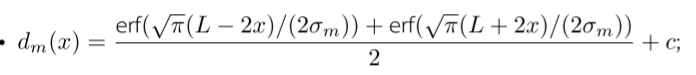

In [194]:
def my_integral(y):
    return np.exp(-y**2)

def erf(x):
    return integrate.quad(my_integral, 0, x)[0] * 2 / np.sqrt(np.pi)

def d(x, L, sigma, c = 0):
    return (erf(np.sqrt(np.pi) * (L-2*x) / (2*sigma)) + erf(np.sqrt(np.pi) * (L+2*x) / (2*sigma)))/2 + c

d_v = np.vectorize(d, otypes=[float])

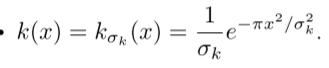

In [195]:
def k(x, sigma):
    return 1/sigma * np.exp(-np.pi * x**2/sigma**2)

k_v = np.vectorize(k, otypes=[float])

In [228]:
L = 1
sigma_m = 1
sigma_k = 1

x = np.linspace(-5,5,300)
x_kernel = np.linspace(-25,50)/12

data_d = d_v(x, L, sigma_k, c = 0)

data_k = k_v(x_kernel, sigma_k)

data_d_m = np.convolve(data_d, data_k, mode='same')

# data_k = np.pad(data_k, (0, len(data_k)-1), 'constant', constant_values=0)

In [229]:
data_k

array([1.19736795e-06, 6.04150609e-06, 2.75212407e-05, 1.13186858e-04,
       4.20270791e-04, 1.40885927e-03, 4.26394138e-03, 1.16509152e-02,
       2.87418067e-02, 6.40137533e-02, 1.28717538e-01, 2.33672369e-01,
       3.82985387e-01, 5.66711793e-01, 7.57089987e-01, 9.13141246e-01,
       9.94337051e-01, 9.77539893e-01, 8.67641992e-01, 6.95267358e-01,
       5.03000391e-01, 3.28541330e-01, 1.93738933e-01, 1.03145195e-01,
       4.95776919e-02, 2.15143789e-02, 8.42900915e-03, 2.98146313e-03,
       9.52110965e-04, 2.74505402e-04, 7.14528290e-05, 1.67916420e-05,
       3.56264140e-06, 6.82427090e-07, 1.18017283e-07, 1.84263863e-08,
       2.59740657e-09, 3.30555893e-10, 3.79800102e-11, 3.93976626e-12,
       3.68969986e-13, 3.11972871e-14, 2.38148485e-15, 1.64128508e-16,
       1.02123438e-17, 5.73683073e-19, 2.90953677e-20, 1.33223509e-21,
       5.50735528e-23, 2.05546707e-24])

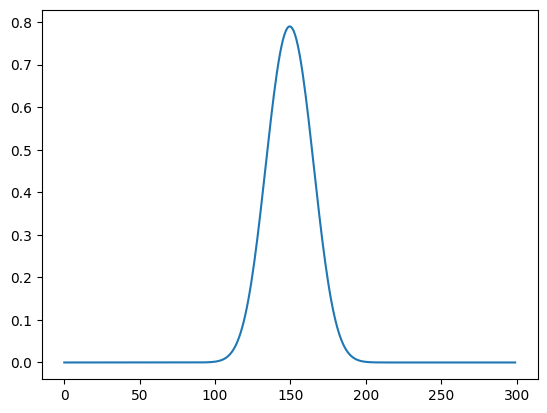

In [230]:
plt.plot(data_d)

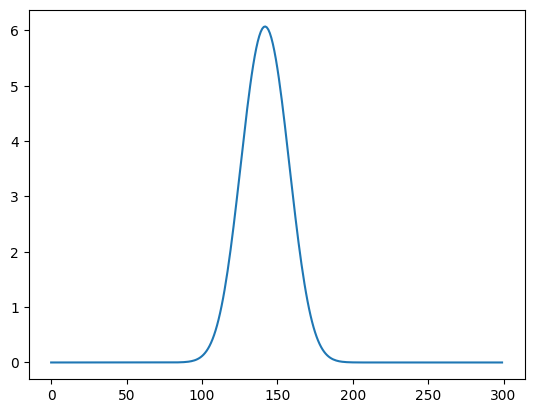

In [231]:
plt.plot(data_d_m)

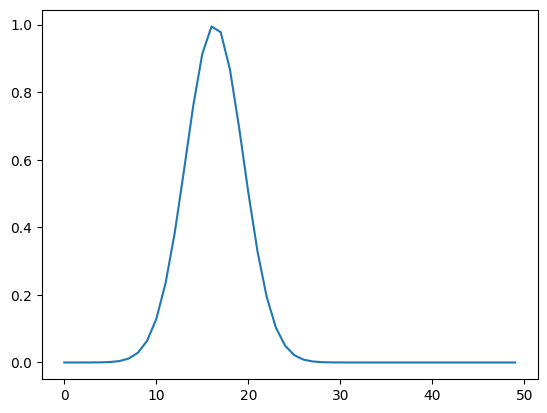

In [232]:
plt.plot(data_k)

In [233]:
recovered, remainder = signal.deconvolve(data_d_m, data_k)

n = len(data_d_m)-len(data_k)+1
# so we need to expand it by
s = int((len(data_d)-n)/2)
#on both sides.
deconv_res = np.zeros(len(data_d))
deconv_res[s:len(data_d)-s-1] = recovered

In [234]:
deconv_res

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        1.48429709e-011, -4.07568822e-011, -8.11008481e-011,
        2.09274680e-011,  5.10383164e-010,  1.60210772e-009,
        1.97724414e-009, -5.98676436e-009, -4.10201884e-008,
       -1.05381418e-007, -2.92492302e-008,  8.69341293e-007,
        3.61430506e-006,  5.72654757e-006, -1.17733253e-005,
       -9.78693031e-005, -2.62450372e-004, -9.05600341e-005,
        2.07978806e-003,  8.71630167e-003,  1.38489281e-002,
       -2.78847789e-002, -2.33379836e-001, -6.27575927e-001,
       -2.27255933e-001,

Because

$$D(ω) K_{σ_k}(ω) = \mathcal{F}(d_m)(ω)  $$

$$ D(ω) =  \mathcal{F}(d_m)(ω)/ K_{σ_k}(ω)$$

for $K_{σ} = \mathcal{F}(k)$, $D = \mathcal{F}(d)$

No need to find $K_{σ}$ and $\mathcal{F}(d)$ analytically.

In [160]:

# fourier transform
fourier_d_m = fftshift(fft(data_d_m))
freq = fftshift(fftfreq(len(data_d_m)))
fourier_k = fftshift(fft(data_k))

# get D(w)
fourier_d = fourier_d_m/fourier_k

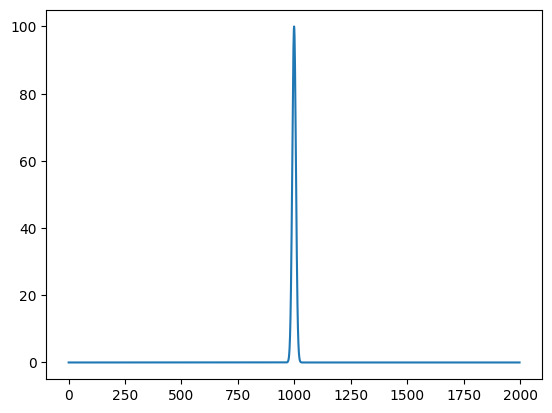

In [161]:
plt.plot( np.abs(fourier_k) )

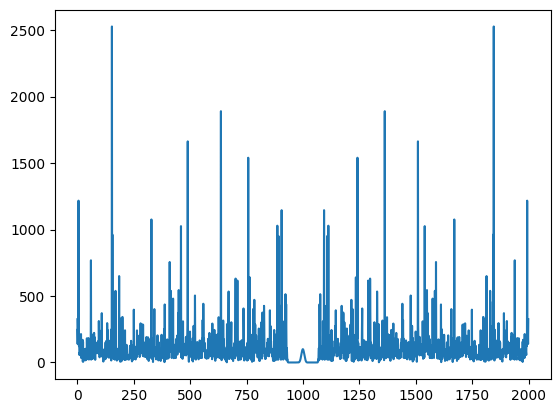

In [162]:
plt.plot( np.abs(fourier_d) )

In [209]:
np.linspace(0,50, 60)

array([ 0.        ,  0.84745763,  1.69491525,  2.54237288,  3.38983051,
        4.23728814,  5.08474576,  5.93220339,  6.77966102,  7.62711864,
        8.47457627,  9.3220339 , 10.16949153, 11.01694915, 11.86440678,
       12.71186441, 13.55932203, 14.40677966, 15.25423729, 16.10169492,
       16.94915254, 17.79661017, 18.6440678 , 19.49152542, 20.33898305,
       21.18644068, 22.03389831, 22.88135593, 23.72881356, 24.57627119,
       25.42372881, 26.27118644, 27.11864407, 27.96610169, 28.81355932,
       29.66101695, 30.50847458, 31.3559322 , 32.20338983, 33.05084746,
       33.89830508, 34.74576271, 35.59322034, 36.44067797, 37.28813559,
       38.13559322, 38.98305085, 39.83050847, 40.6779661 , 41.52542373,
       42.37288136, 43.22033898, 44.06779661, 44.91525424, 45.76271186,
       46.61016949, 47.45762712, 48.30508475, 49.15254237, 50.        ])

In [212]:
np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )

array([0.01303291, 0.01844061, 0.02571749, 0.03535096, 0.04789535,
       0.06395949, 0.08418524, 0.10921603, 0.13965491, 0.1760133 ,
       0.21865236, 0.26772089, 0.32309467, 0.38432332, 0.45059161,
       0.52070157, 0.59308111, 0.66582289, 0.73675446, 0.80353768,
       0.86379193, 0.91523255, 0.95581357, 0.98386237, 0.99819394,
       0.99819394, 0.98386237, 0.95581357, 0.91523255, 0.86379193,
       0.80353768, 0.73675446, 0.66582289, 0.59308111, 0.52070157,
       0.45059161, 0.38432332, 0.32309467, 0.26772089, 0.21865236,
       0.1760133 , 0.13965491, 0.10921603, 0.08418524, 0.06395949,
       0.04789535, 0.03535096, 0.02571749, 0.01844061, 0.01303291])

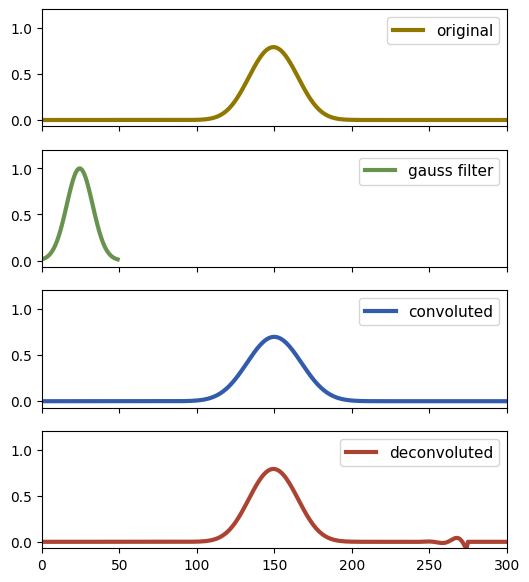

In [210]:

# let the signal be box-like
sig = np.repeat([0., 1., 0.], 100)
sig = d_v(np.linspace(-5,5, 300), L, sigma_k, c = 0)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same')
filtered = np.convolve(sig, gauss, mode='same')

deconv,  _ = signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(sig)-len(gauss)+1
# so we need to expand it by
s = int((len(sig)-n)/2)
#on both sides.
deconv_res = np.zeros(len(sig))
deconv_res[s:len(sig)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution
# expanded to the original shape (filled with zeros)


#### Plot ####
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(sig,            color="#907700", label="original",     lw=3 )
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 )

for i in range(len(ax)):
    ax[i].set_xlim([0, len(sig)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.show()

In [171]:
deconv_res

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.